In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

df = pd.read_csv('housing.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [2]:
y = df.iloc[:,-2]
x = df.iloc[:,:-2]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

In [3]:
train_set, test_set = train_test_split(df, test_size=0.2,random_state=42)

test_set.value_counts(df['median_income']) / len(test_set)

,count
median_income,
4.0000,0.004118
3.8750,0.002665
2.8750,0.002665
1.6250,0.002422
3.5000,0.002422
...,...
2.9640,0.000242
2.9663,0.000242
2.9712,0.000242


In [4]:
df['categories'] = pd.cut(df['median_income'],bins= [0.,1.5,3,4.5,6,np.inf], labels= [1,2,3,4,5])

In [5]:
strat_train_set, strat_test_set = train_test_split(df, test_size=0.2, stratify=df['categories'] ,random_state=42)

strat_test_set['categories'].value_counts() / len(strat_test_set)

,count
categories,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [6]:
df = strat_train_set.drop(["median_house_value",'categories'], axis=1) # drop labels for training set
df_labels = strat_train_set["median_house_value"].copy()

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [9]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,158
population,0
households,0
median_income,0
ocean_proximity,0


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df_num = df.drop('ocean_proximity', axis=1)

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

df_num_tr = num_pipeline.fit_transform(df_num)

In [11]:
df_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

num_attribs = list(df_num)
cat_attribs = ['ocean_proximity']

full_preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(handle_unknown="ignore"),cat_attribs),
])
df_prepared = full_preprocessing.fit_transform(df)

In [13]:
df_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

## Fine Tuning ALL 4 Models

In [32]:
## First we do Grid search on all of them.

In [15]:
## We will start with RandomForest Regressor

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = [

    {'n_estimators': [3,10,50,100], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

Random_reg = RandomForestRegressor(random_state=13)

ran_grid_search = GridSearchCV(Random_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
ran_grid_search.fit(df_prepared, df_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 50, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [26]:
ran_grid_search.best_params_

{'max_features': 8, 'n_estimators': 100}

In [27]:
ran_grid_search.best_estimator_

RandomForestRegressor(max_features=8, random_state=13)

In [39]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [55]:
## Cross validation on these best params
Random_reg = RandomForestRegressor(max_features=8,n_estimators=100,random_state=13)
Random_scores = cross_val_score(Random_reg, df_prepared, df_labels, scoring='neg_mean_squared_error',cv=10)

Random_rmse_scores = np.sqrt(-Random_scores)
display_scores(Random_rmse_scores)

Scores: [50451.53551614 48955.16850652 45368.85098614 50101.50079528
 47085.57479378 48999.18923133 50858.72618083 48616.96493668
 47085.6640896  52422.47458486]
Mean: 48994.5649621153
Standard deviation: 1978.682254642884


In [86]:
## Feature Importances

feature_importances = ran_grid_search.best_estimator_.feature_importances_
feature_importances

array([1.14023861e-01, 1.04242281e-01, 5.09204998e-02, 2.95241279e-02,
       2.68358873e-02, 3.78783186e-02, 2.51695290e-02, 4.48838111e-01,
       1.26801037e-02, 1.40818851e-01, 4.20234499e-05, 2.69748687e-03,
       6.32891940e-03])

In [88]:
cat_encoder = full_preprocessing.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
df_imp_fea_sorted = sorted(zip(feature_importances, attributes), reverse=True)

In [30]:
## Linear Regression Fine Tuning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
param_grid = {

    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

lin_reg = LinearRegression()

lin_grid_search = GridSearchCV(lin_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
lin_grid_search.fit(df_prepared, df_labels)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [31]:
lin_grid_search.best_params_

{'copy_X': True, 'fit_intercept': True}

In [42]:
lin_scores = cross_val_score(lin_reg, df_prepared, df_labels, scoring='neg_mean_squared_error',cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [72229.03469752 65318.2240289  67706.39604745 69368.53738998
 66767.61061621 73003.75273869 70522.24414582 69440.77896541
 66930.32945876 70756.31946074]
Mean: 69204.32275494763
Standard deviation: 2372.070791055922


In [44]:
## Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV
param_grid = {

   'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_reg = DecisionTreeRegressor(random_state=13)

tree_grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
tree_grid_search.fit(df_prepared, df_labels)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=13),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [45]:
tree_grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [48]:
tree_reg = DecisionTreeRegressor(max_depth = 10,min_samples_leaf = 4, min_samples_split=10 ,random_state=13)
tree_scores = cross_val_score(tree_reg, df_prepared, df_labels, scoring='neg_mean_squared_error',cv=10)

tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [62348.8158588  59856.99937624 56054.92850143 61178.84186548
 58603.66568812 62565.25435286 62369.23854375 61269.51900776
 59431.57214744 61817.90565256]
Mean: 60549.67409944437
Standard deviation: 1971.1003681289094


In [36]:
## Let's do GridSearch on SVR (Support Vector Regressor)

from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel':['linear'], 'C':[30000,90000,120000,150000]},
    {'kernel':['rbf'], 'C':[90000,120000,150000,160000]},
    {'gamma' : [0.01, 0.03,0.1,1.0,3.0]},
]

svm_reg = SVR()
svr_grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error',verbose=2)
svr_grid_search.fit(df_prepared,df_labels)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] END .............................C=30000, kernel=linear; total time=  16.1s
[CV] END .............................C=30000, kernel=linear; total time=  16.0s
[CV] END .............................C=30000, kernel=linear; total time=  15.3s
[CV] END .............................C=30000, kernel=linear; total time=  16.8s
[CV] END .............................C=30000, kernel=linear; total time=  16.0s
[CV] END .............................C=90000, kernel=linear; total time=  24.3s
[CV] END .............................C=90000, kernel=linear; total time=  24.8s
[CV] END .............................C=90000, kernel=linear; total time=  25.5s
[CV] END .............................C=90000, kernel=linear; total time= 2.1min
[CV] END .............................C=90000, kernel=linear; total time=  38.2s
[CV] END ............................C=120000, kernel=linear; total time=  54.5s
[CV] END ............................C=120000, k

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [30000, 90000, 120000, 150000],
                          'kernel': ['linear']},
                         {'C': [90000, 120000, 150000, 160000],
                          'kernel': ['rbf']},
                         {'gamma': [0.01, 0.03, 0.1, 1.0, 3.0]}],
             scoring='neg_mean_squared_error', verbose=2)

In [37]:
svr_grid_search.best_params_

{'C': 160000, 'kernel': 'rbf'}

In [38]:
## Cross Validation on the above grid search svr

from sklearn.model_selection import cross_val_score
svr_reg = SVR(kernel='rbf', C = 160000)
scores = cross_val_score(svr_reg,df_prepared, df_labels, scoring='neg_mean_squared_error',cv=10)
svr_rmse_scores = np.sqrt(-scores)
svr_rmse_scores

array([59335.10989744, 53974.35448151, 51810.93834522, 57666.5389888 ,
       52848.77562135, 58518.63284158, 58428.66560393, 56206.88021441,
       54688.97072866, 58953.10498683])

In [41]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(svr_rmse_scores)

Scores: [59335.10989744 53974.35448151 51810.93834522 57666.5389888
 52848.77562135 58518.63284158 58428.66560393 56206.88021441
 54688.97072866 58953.10498683]
Mean: 56243.19717097381
Standard deviation: 2600.286680951228


In [ ]:
### Comparing all the RMSE's of differnt models
## Make a graph of them

### Now start the Randomized search for all of them

In [ ]:
## We will start with RandomFrorest Regressor

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

Random_reg = RandomForestRegressor(random_state=13)
Rand_rnd_search = RandomizedSearchCV(Random_reg, param_distributions=param_distribs, n_iter=10, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
Rand_rnd_search.fit(df_prepared, df_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78d9506cb7a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78d94c1ac740>},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [52]:
cvres = Rand_rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49371.174159129114 {'max_features': 7, 'n_estimators': 99}
50439.85365049894 {'max_features': 3, 'n_estimators': 103}
49294.508356651335 {'max_features': 5, 'n_estimators': 155}
49370.85218325494 {'max_features': 6, 'n_estimators': 88}
50232.80893968421 {'max_features': 4, 'n_estimators': 41}
53926.289428424345 {'max_features': 2, 'n_estimators': 14}
54563.622579692266 {'max_features': 1, 'n_estimators': 27}
50588.395238584715 {'max_features': 4, 'n_estimators': 26}
51585.27472822181 {'max_features': 2, 'n_estimators': 108}
49606.311630179545 {'max_features': 4, 'n_estimators': 107}


In [53]:
Rand_rnd_search.best_params_

{'max_features': 5, 'n_estimators': 155}

In [54]:
## Cross validation on these best params
Random_reg = RandomForestRegressor(max_features=5,n_estimators=155)

Random_scores = cross_val_score(Random_reg, df_prepared, df_labels, scoring='neg_mean_squared_error',cv=10)

Random_rmse_scores = np.sqrt(-Random_scores)
display_scores(Random_rmse_scores)

Scores: [50396.73033587 48032.72085319 44828.34141535 49815.41200061
 47477.08981509 48768.02052758 51164.35172822 48431.63317149
 47272.55178887 52652.14322658]
Mean: 48883.899486286544
Standard deviation: 2110.0255921557964


In [59]:
## Now we will for Decison Tree

param_dist = {
   'max_depth': [None] + list(range(3,30)),
    'min_samples_split': np.arange(2,20),
    'min_samples_leaf': np.arange(1,10)
}
tree_reg = DecisionTreeRegressor(random_state=13)
rand_dt = RandomizedSearchCV(tree_reg,param_dist, n_iter=20,cv=5,scoring='neg_mean_squared_error',random_state=13,n_jobs=-1)
rand_dt.fit(df_prepared, df_labels)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=13),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
                   random_state=13, scoring='neg_mean_squared_error')

In [62]:
rand_dt.best_params_

{'min_samples_split': np.int64(12),
 'min_samples_leaf': np.int64(9),
 'max_depth': 21}

In [63]:
tree_reg = DecisionTreeRegressor(max_depth = 21,min_samples_leaf = 9, min_samples_split=12 ,random_state=13)
tree_scores = cross_val_score(tree_reg, df_prepared, df_labels, scoring='neg_mean_squared_error',cv=10)

tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [62044.647875   58457.51029439 56538.46811732 58323.71282611
 57259.16379942 59644.57256472 60173.32678094 57855.67769842
 57485.32263169 62503.40943495]
Mean: 59028.58120229454
Standard deviation: 1917.6232527635573


In [65]:
## NOw For SVR(support Vector Regressor)


from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'kernel': ['rbf'],
    'C': [150000,160000,170000,180000,200000],
    'gamma': [0.01, 0.03,0.1,1.0],
}

svm_reg = SVR()
svr_rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_grid,
                                n_iter=30, cv=5,scoring='neg_mean_squared_error',
                                verbose=2,random_state=13)

svr_rnd_search.fit(df_prepared,df_labels)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 20 is smaller than n_iter=30. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ...................C=150000, gamma=0.01, kernel=rbf; total time=  13.5s
[CV] END ...................C=150000, gamma=0.01, kernel=rbf; total time=  13.5s
[CV] END ...................C=150000, gamma=0.01, kernel=rbf; total time=  15.1s
[CV] END ...................C=150000, gamma=0.01, kernel=rbf; total time=  18.2s
[CV] END ...................C=150000, gamma=0.01, kernel=rbf; total time=  17.7s
[CV] END ...................C=150000, gamma=0.03, kernel=rbf; total time=  14.7s
[CV] END ...................C=150000, gamma=0.03, kernel=rbf; total time=  15.6s
[CV] END ...................C=150000, gamma=0.03, kernel=rbf; total time=  13.9s
[CV] END ...................C=150000, gamma=0.03, kernel=rbf; total time=  14.1s
[CV] END ...................C=150000, gamma=0.03, kernel=rbf; total time=  14.0s
[CV] END ....................C=150000, gamma=0.1, kernel=rbf; total time=  18.0s
[CV] END ....................C=150000, gamma=0.

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=30,
                   param_distributions={'C': [150000, 160000, 170000, 180000,
                                              200000],
                                        'gamma': [0.01, 0.03, 0.1, 1.0],
                                        'kernel': ['rbf']},
                   random_state=13, scoring='neg_mean_squared_error',
                   verbose=2)

In [67]:
svr_rnd_search.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 200000}

In [69]:
## Cross Validation on the above Randomized search svr

from sklearn.model_selection import cross_val_score
svr_reg = SVR(kernel='rbf', C = 200000,gamma=0.1)
scores = cross_val_score(svr_reg,df_prepared, df_labels, scoring='neg_mean_squared_error',cv=10)
svr_rmse_scores = np.sqrt(-scores)
svr_rmse_scores

array([59367.48880249, 54050.71853032, 51861.00165021, 57604.93086291,
       52938.07010797, 58553.86478692, 58560.28063867, 56293.12906746,
       54696.32408657, 58948.54649593])

In [70]:
display_scores(svr_rmse_scores)

Scores: [59367.48880249 54050.71853032 51861.00165021 57604.93086291
 52938.07010797 58553.86478692 58560.28063867 56293.12906746
 54696.32408657 58948.54649593]
Mean: 56287.435502944725
Standard deviation: 2587.5219178231223


### Comparing all 4 models (Charts&Graph)

In [99]:
results = {}

results['Linear Regression'] = {
    'Best Params': lin_grid_search.best_params_,
    'RMSE': lin_rmse_scores.mean()
}
results['Decision Tree'] = {
    "Best Params": rand_dt.best_params_,
    "RMSE": tree_rmse_scores.mean()
}
results['Random Forest'] = {
    "Best Params": ran_grid_search.best_params_,
    "RMSE": Random_rmse_scores.mean()
}
results['SVR'] = {
    "Best Params": svr_grid_search.best_params_,
    "RMSE": svr_rmse_scores.mean()
}

results

{'Linear Regression': {'Best Params': {'copy_X': True, 'fit_intercept': True},
  'RMSE': np.float64(69204.32275494763)},
 'Decision Tree': {'Best Params': {'min_samples_split': np.int64(12),
   'min_samples_leaf': np.int64(9),
   'max_depth': 21},
  'RMSE': np.float64(59028.58120229454)},
 'Random Forest': {'Best Params': {'max_features': 8, 'n_estimators': 100},
  'RMSE': np.float64(48994.5649621153)},
 'SVR': {'Best Params': {'C': 160000, 'kernel': 'rbf'},
  'RMSE': np.float64(56287.435502944725)}}

In [115]:
df_results = pd.DataFrame(results).T
df_results

,Best Params,RMSE
Linear Regression,"{'copy_X': True, 'fit_intercept': True}",69204.322755
Decision Tree,"{'min_samples_split': 12, 'min_samples_leaf': ...",59028.581202
Random Forest,"{'max_features': 8, 'n_estimators': 100}",48994.564962
SVR,"{'C': 160000, 'kernel': 'rbf'}",56287.435503


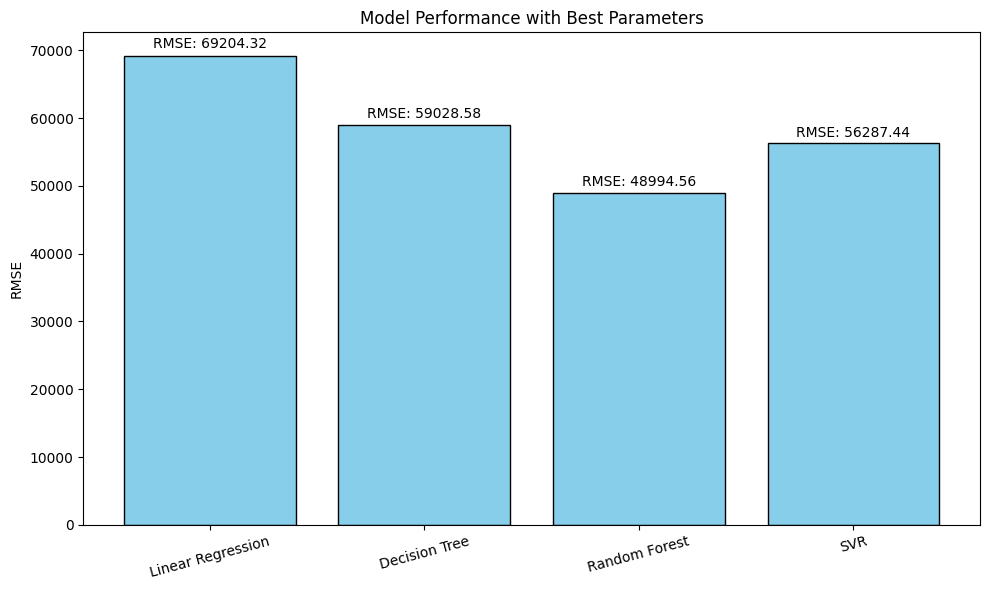

In [113]:
import matplotlib.pyplot as plt

# Ensure RMSE is numeric
rmse_values = df_results['RMSE'].astype(float)
best_params = df_results['Best Params']

plt.figure(figsize=(10,6))
bars = plt.bar(rmse_values.index, rmse_values.values, color='skyblue', edgecolor='black')

plt.ylabel("RMSE")
plt.title("Model Performance with Best Parameters")
plt.xticks(rotation=15)

# Annotate RMSE & Best Params on each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    params_text = str(best_params.iloc[i])   # Convert dict to string
    # Show RMSE value slightly above bar
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01*height,
             f"RMSE: {height:.2f}",
             ha='center', va='bottom', fontsize=10, color='black')


plt.tight_layout()
plt.show()


## Evaluating the Best model on Test set

In [116]:
# Since our Best Model is Random Forest Regressor

In [98]:
from sklearn.metrics import mean_squared_error

final_model = ran_grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_preprocessing.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

np.float64(46716.57667765285)

In [ ]:
## evaluating with graphs and charts.

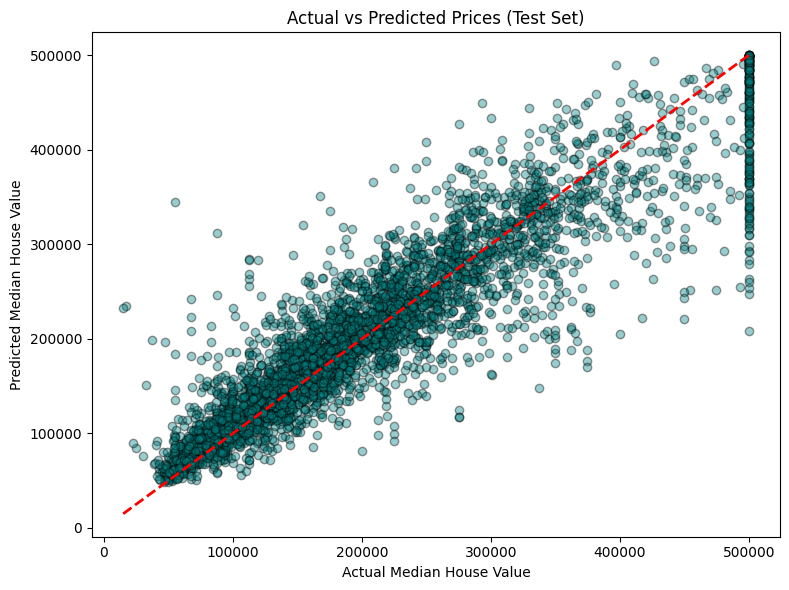

In [117]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
plt.scatter(y_test, final_predictions, alpha=0.4, color='teal', edgecolors='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)  # Perfect prediction line
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Prices (Test Set)")
plt.tight_layout()
plt.show()
